<a href="https://colab.research.google.com/github/rahulrajpr/TensorFlowDeveloperCertifcateTraining/blob/ConvolutionalNueralNetwork/CNN_ComputerVision_MultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import zipfile
import warnings 
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import os

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zipref = zipfile.ZipFile('10_food_classes_all_data.zip')

zipref.extractall()

zipref.close()

--2023-02-12 04:37:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 142.251.107.128, 74.125.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  82.4MB/s    in 5.5s    

2023-02-12 04:37:08 (89.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
ls 10_food_classes_all_data

test/  train/


In [4]:
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):

  print(dirpath,len(dirnames),' directories', len(filenames),' imgaes')

10_food_classes_all_data 2  directories 0  imgaes
10_food_classes_all_data/train 10  directories 0  imgaes
10_food_classes_all_data/train/pizza 0  directories 750  imgaes
10_food_classes_all_data/train/chicken_curry 0  directories 750  imgaes
10_food_classes_all_data/train/hamburger 0  directories 750  imgaes
10_food_classes_all_data/train/ramen 0  directories 750  imgaes
10_food_classes_all_data/train/grilled_salmon 0  directories 750  imgaes
10_food_classes_all_data/train/sushi 0  directories 750  imgaes
10_food_classes_all_data/train/fried_rice 0  directories 750  imgaes
10_food_classes_all_data/train/steak 0  directories 750  imgaes
10_food_classes_all_data/train/ice_cream 0  directories 750  imgaes
10_food_classes_all_data/train/chicken_wings 0  directories 750  imgaes
10_food_classes_all_data/test 10  directories 0  imgaes
10_food_classes_all_data/test/pizza 0  directories 250  imgaes
10_food_classes_all_data/test/chicken_curry 0  directories 250  imgaes
10_food_classes_all_data/

Looks like 750 images for each 10 classes for training and 250 images for each 10 classes for test.

In [5]:
# create the directories

train_dir = '10_food_classes_all_data/train'

test_dir = '10_food_classes_all_data/test'

> Get the class names from the directories

In [6]:
!ls 10_food_classes_all_data/train

chicken_curry  fried_rice      hamburger  pizza  steak
chicken_wings  grilled_salmon  ice_cream  ramen  sushi


The Above code cannot support any of the python data structue, it is basically linux code , prints the value into the kernal.

**We need to use the pathlib library to get the directories name** which can be used as the class names

In [7]:
import pathlib

In [8]:
path_dir = pathlib.Path(train_dir)
path_dir

PosixPath('10_food_classes_all_data/train')

In [9]:
path_dir.glob('*')

<generator object Path.glob at 0x7f657c19df90>

In [10]:
class_names = [x.name for x in path_dir.glob('*')]
class_names = sorted(class_names)
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [11]:
import random

def view_random_img():

  class_name = random.choice(class_names)
  random_class_dir = train_dir+'/'+class_name

  img_list = os.listdir(random_class_dir)
  rand_img_ind = random.randint(0, len(img_list))

  rand_img = img_list[rand_img_ind]
  rand_img_dir = random_class_dir+'/'+rand_img

  img_value = mpimg.imread(rand_img_dir)

  print('shape : ', img_value.shape)
  plt.title(class_name)
  plt.imshow(img_value)
  plt.axis(False);

shape :  (341, 512, 3)


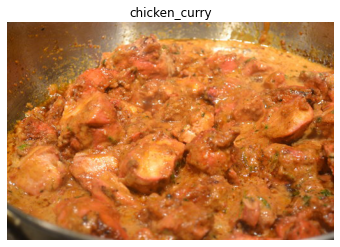

In [12]:
view_random_img()

Lets load the train and test images

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_data_gen = ImageDataGenerator(rescale = 1/225)
test_data_gen = ImageDataGenerator(rescale = 1/225)

In [15]:
IMG_SIZE = (224,224)

In [16]:
tf.random.set_seed(42)

train_data = train_data_gen.flow_from_directory(directory = train_dir,
                                                target_size = IMG_SIZE,
                                                class_mode = 'categorical',
                                                batch_size = 32)

test_data = train_data_gen.flow_from_directory(directory = test_dir,
                                                target_size = IMG_SIZE,
                                                class_mode = 'categorical',
                                                batch_size = 32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [17]:
print('number of the batched in the train data :',len(train_data))
print('number of the batched in the test data :',len(test_data))

number of the batched in the train data : 235
number of the batched in the test data : 79


In [18]:
train_data.next()[0].shape

(32, 224, 224, 3)

### Create the baseline Model

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

In [20]:
# build the model

tf.random.set_seed(42)

model_1 = Sequential([Conv2D(filters = 10,kernel_size = (3,3),input_shape = (224,224,3), activation = 'relu'),
                      Conv2D(10,(3,3), activation = 'relu'),
                      MaxPool2D(),
                      Conv2D(10,(3,3), activation = 'relu'),
                      Conv2D(10,(3,3), activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(units = 10, activation = 'softmax')])

# compile the model 

model_1.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# fit the model

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 68s 245ms/step - loss: 2.1275 - accuracy: 0.2292 - val_loss: 1.9734 - val_accuracy: 0.3008
Epoch 2/5
235/235 [==============================] - 46s 197ms/step - loss: 1.8815 - accuracy: 0.3467 - val_loss: 1.8893 - val_accuracy: 0.3520
Epoch 3/5
235/235 [==============================] - 47s 199ms/step - loss: 1.5564 - accuracy: 0.4724 - val_loss: 1.9010 - val_accuracy: 0.3572
Epoch 4/5
235/235 [==============================] - 47s 199ms/step - loss: 1.0486 - accuracy: 0.6476 - val_loss: 2.2416 - val_accuracy: 0.3080
Epoch 5/5
235/235 [==============================] - 46s 197ms/step - loss: 0.4897 - accuracy: 0.8519 - val_loss: 2.9654 - val_accuracy: 0.2976


In [22]:
# function for platting evaluation curve

def eval_plot(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  plt.figure(figsize = (18,6))
  plt.subplot(1,2,1)
  plt.plot(loss, label = 'loss')
  plt.plot(val_loss,label = 'validation loss')
  plt.xlabel('epochs')
  plt.title('loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(accuracy, label = 'accuracy')
  plt.plot(val_accuracy,label = 'validation accuracy')
  plt.xlabel('epochs')
  plt.title('accuracy')
  plt.legend()

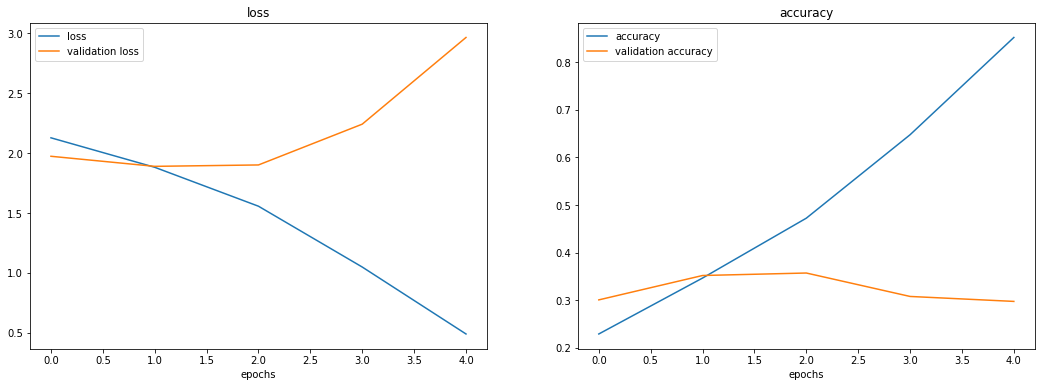

In [23]:
eval_plot(history_1)

Lets try to reduce the complexity - remove 2 Conv2D layers

In [21]:
# build the model

tf.random.set_seed(42)

model_2 = Sequential([Conv2D(filters = 10,kernel_size = (3,3),input_shape = (224,224,3), activation = 'relu'),
                      MaxPool2D(),
                      Conv2D(10,(3,3), activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(units = 10, activation = 'softmax')])

# compile the model 

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# fit the model

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 186ms/step - loss: 2.1196 - accuracy: 0.2395 - val_loss: 1.9349 - val_accuracy: 0.3124
Epoch 2/5
235/235 [==============================] - 44s 187ms/step - loss: 1.6984 - accuracy: 0.4332 - val_loss: 1.8914 - val_accuracy: 0.3456
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 1.3216 - accuracy: 0.5737 - val_loss: 1.8962 - val_accuracy: 0.3492
Epoch 4/5
235/235 [==============================] - 45s 191ms/step - loss: 0.8382 - accuracy: 0.7460 - val_loss: 2.1053 - val_accuracy: 0.3336
Epoch 5/5
235/235 [==============================] - 45s 190ms/step - loss: 0.4440 - accuracy: 0.8765 - val_loss: 2.5776 - val_accuracy: 0.3148


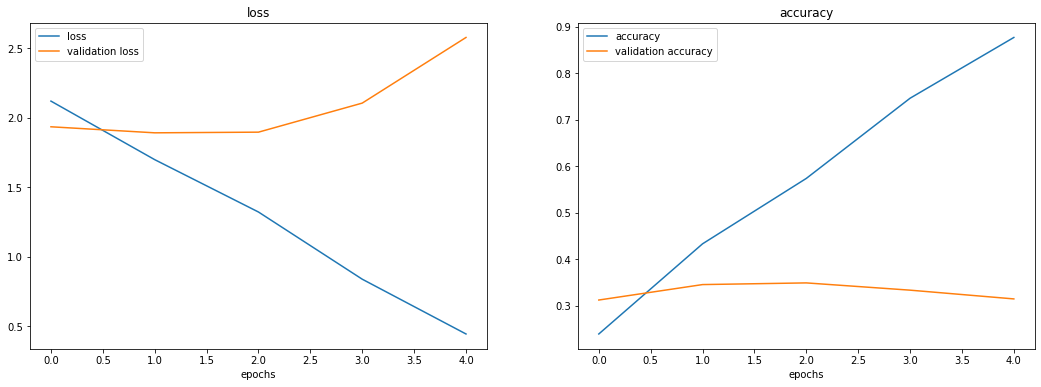

In [24]:
eval_plot(history_2)

**Ways to Improve a model**

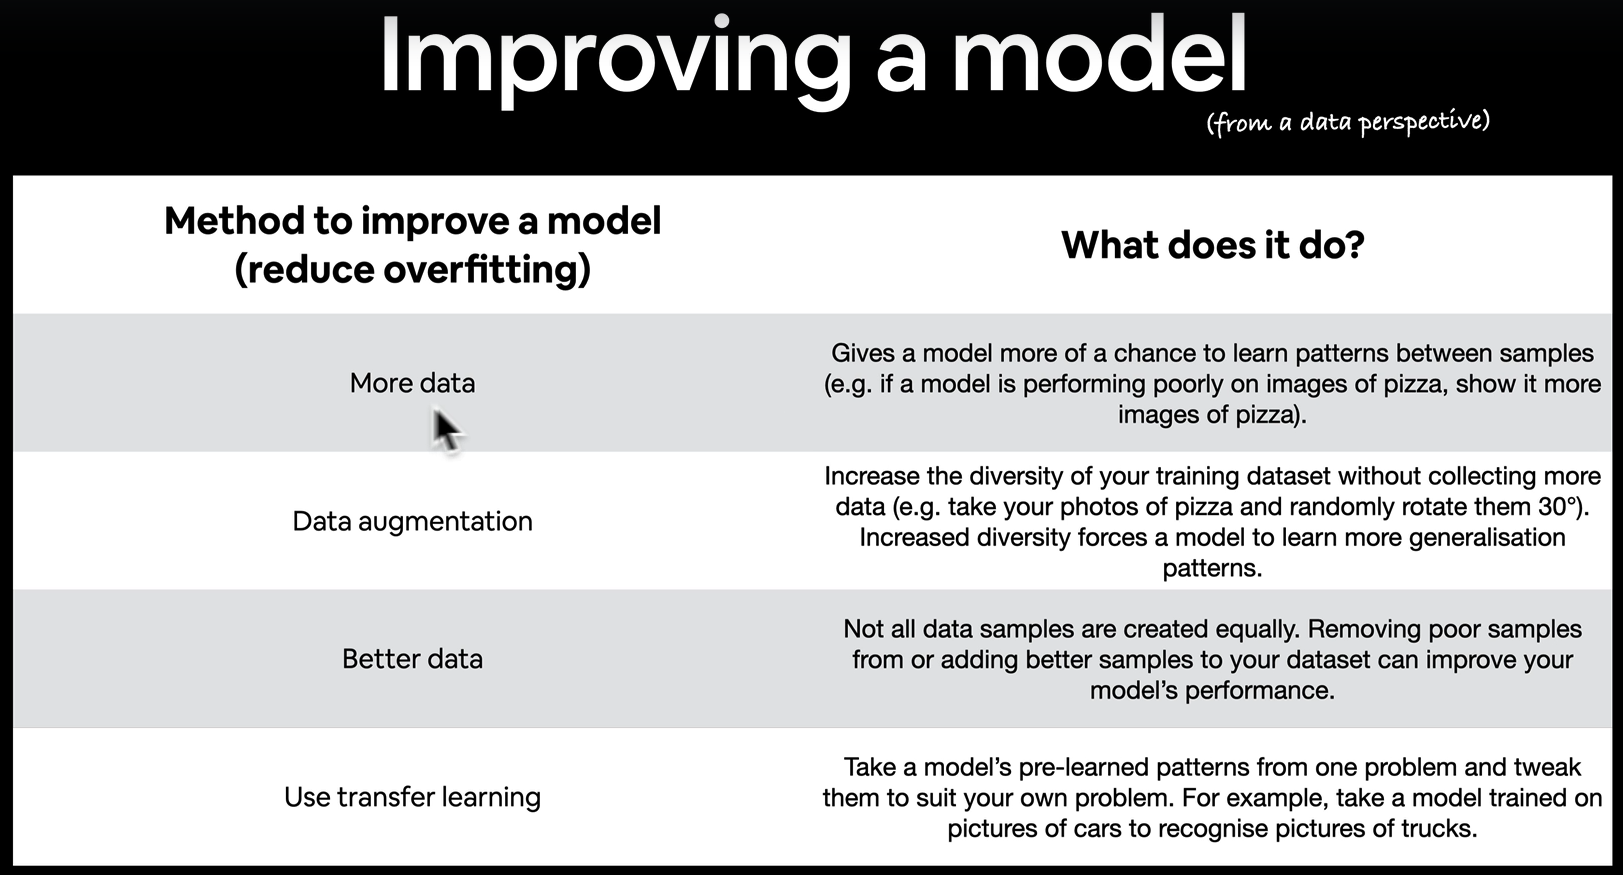

model_1 seems good and we will try to train the model1 in augmented data to increase the diversity

In [27]:
train_datagen_aug = ImageDataGenerator(rescale = 1/225.,
                                       rotation_range = 0.2,
                                       height_shift_range = 0.2,
                                       width_shift_range = 0.2,
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       vertical_flip = True,
                                       horizontal_flip = True)

train_data_aug = train_datagen_aug.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode= 'categorical',
                                                       batch_size = 32,
                                                       shuffle = True,
                                                       seed = 42)

Found 7500 images belonging to 10 classes.


Lets train the model1 on the augmented data

In [29]:
# clone the model foe easyness

# cloning return a same model structure without any learning , which needs to be compiled and trained on diffrent dataset

tf.random.set_seed(42)

model_3 = tf.keras.models.clone_model(model_1)

model_3.compile(loss = 'categorical_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])

history_3 = model_3.fit(train_data_aug,
                        epochs = 5,
                        steps_per_epoch = len(train_data_aug),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 115s 483ms/step - loss: 2.2166 - accuracy: 0.1781 - val_loss: 2.0777 - val_accuracy: 0.2700
Epoch 2/5
235/235 [==============================] - 113s 482ms/step - loss: 2.0945 - accuracy: 0.2565 - val_loss: 1.9632 - val_accuracy: 0.3116
Epoch 3/5
235/235 [==============================] - 113s 483ms/step - loss: 2.0543 - accuracy: 0.2725 - val_loss: 1.9536 - val_accuracy: 0.3016
Epoch 4/5
235/235 [==============================] - 113s 483ms/step - loss: 2.0148 - accuracy: 0.2899 - val_loss: 1.8972 - val_accuracy: 0.3436
Epoch 5/5
235/235 [==============================] - 123s 522ms/step - loss: 1.9787 - accuracy: 0.3079 - val_loss: 1.8310 - val_accuracy: 0.3776


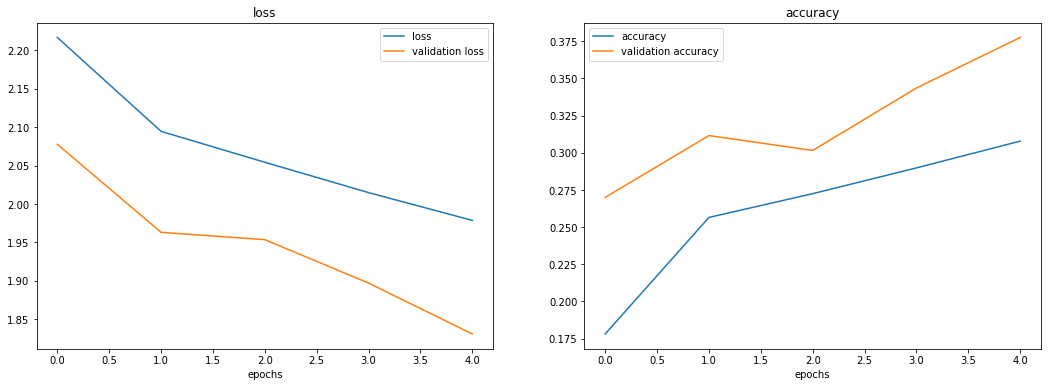

In [30]:
eval_plot(history_3)

Now the model looks promising as the loss curve moves in the right directioin for both train and testing.

we can improve these model by

- adding more data
- fine tuning the augmetation
- more epochs
- more layers and units
- training for longer 

In [31]:
# lets try to train for longer - 10 epochs

tf.random.set_seed(42)

model_4 = tf.keras.models.clone_model(model_1)

model_4.compile(loss = 'categorical_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])

history_4 = model_4.fit(train_data_aug,
                        epochs = 10,
                        steps_per_epoch = len(train_data_aug),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
235/235 [==============================] - 115s 481ms/step - loss: 2.2602 - accuracy: 0.1521 - val_loss: 2.0988 - val_accuracy: 0.2224
Epoch 2/10
235/235 [==============================] - 113s 483ms/step - loss: 2.1379 - accuracy: 0.2245 - val_loss: 2.0228 - val_accuracy: 0.2808
Epoch 3/10
235/235 [==============================] - 113s 482ms/step - loss: 2.0980 - accuracy: 0.2437 - val_loss: 1.9638 - val_accuracy: 0.3000
Epoch 4/10
235/235 [==============================] - 113s 481ms/step - loss: 2.0688 - accuracy: 0.2708 - val_loss: 1.9535 - val_accuracy: 0.3176
Epoch 5/10
235/235 [==============================] - 113s 480ms/step - loss: 2.0370 - accuracy: 0.2880 - val_loss: 1.8521 - val_accuracy: 0.3528
Epoch 6/10
235/235 [==============================] - 114s 484ms/step - loss: 1.9869 - accuracy: 0.3075 - val_loss: 1.8968 - val_accuracy: 0.3556
Epoch 7/10
235/235 [==============================] - 114s 487ms/step - loss: 1.9673 - accuracy: 0.3157 - val_loss: 1.9176 -

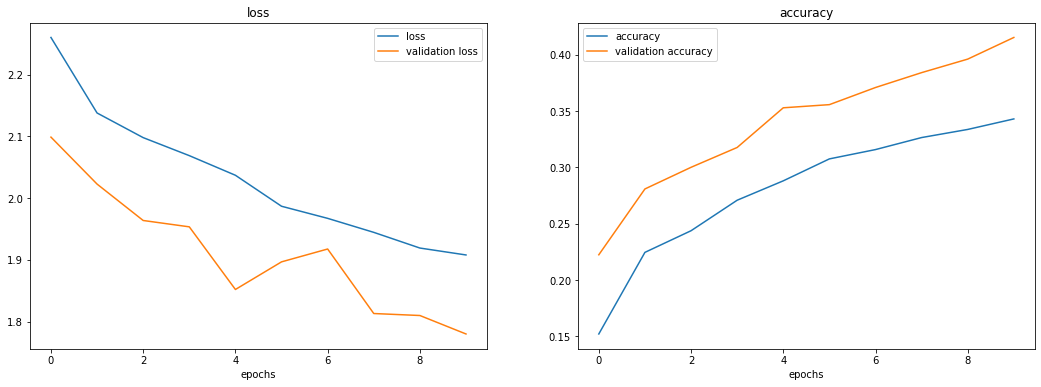

In [32]:
eval_plot(history_4)

The model 4 has definately incresed the accuracy and the the train and test identical in terms of the loss curve.

let us try introduce one more conv2d network into the new model with 10 epochs

In [33]:
# build the model

tf.random.set_seed(42)

model_5 = Sequential([Conv2D(filters = 10,kernel_size = (3,3),input_shape = (224,224,3), activation = 'relu'),
                      Conv2D(10,(3,3), activation = 'relu'),
                      Conv2D(10,(3,3), activation = 'relu'),
                      MaxPool2D(),
                      Conv2D(10,(3,3), activation = 'relu'),
                      Conv2D(10,(3,3), activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(units = 10, activation = 'softmax')])

# compile the model 

model_5.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# fit the model

history_5 = model_5.fit(train_data_aug,
                        epochs = 10,
                        steps_per_epoch = len(train_data_aug),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
235/235 [==============================] - 117s 489ms/step - loss: 2.3025 - accuracy: 0.1041 - val_loss: 2.3023 - val_accuracy: 0.0956
Epoch 2/10
235/235 [==============================] - 115s 488ms/step - loss: 2.2751 - accuracy: 0.1279 - val_loss: 2.2571 - val_accuracy: 0.1372
Epoch 3/10
235/235 [==============================] - 115s 490ms/step - loss: 2.2042 - accuracy: 0.1789 - val_loss: 2.1010 - val_accuracy: 0.2456
Epoch 4/10
235/235 [==============================] - 116s 495ms/step - loss: 2.1399 - accuracy: 0.2236 - val_loss: 2.0154 - val_accuracy: 0.2912
Epoch 5/10
235/235 [==============================] - 114s 486ms/step - loss: 2.0821 - accuracy: 0.2499 - val_loss: 1.9803 - val_accuracy: 0.2864
Epoch 6/10
235/235 [==============================] - 114s 486ms/step - loss: 2.0453 - accuracy: 0.2723 - val_loss: 1.9477 - val_accuracy: 0.3172
Epoch 7/10
235/235 [==============================] - 114s 487ms/step - loss: 2.0230 - accuracy: 0.2835 - val_loss: 1.9161 -

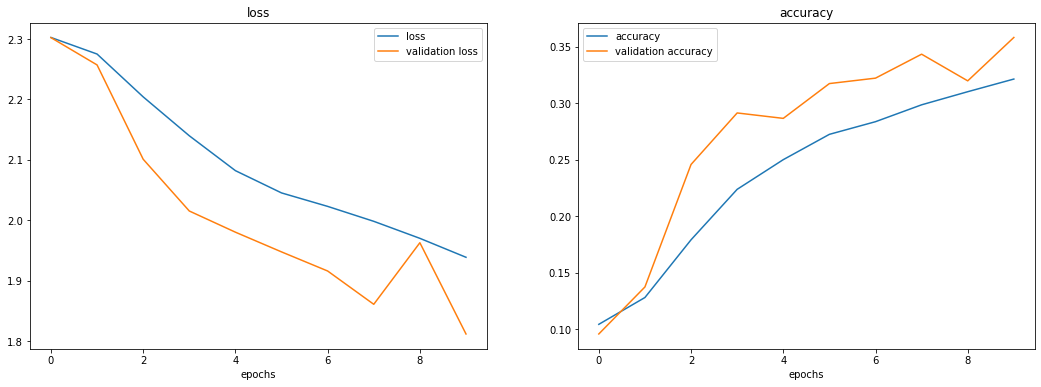

In [34]:
eval_plot(history_5)

#Inference : The best model here is model 4 

lets test the model 4 on the unseen data

In [37]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

--2023-02-12 06:04:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.07s   

2023-02-12 06:04:11 (51.2 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]



In [74]:
def predict_image(model,image_name):

  img_f = image_name

  fl = tf.io.read_file(img_f)
  im = tf.image.decode_image(fl)
  im_resize = tf.image.resize(im, size = (224,224))

  pred_array = model.predict(tf.expand_dims(im_resize, axis =0))[0]
  confidence = round(np.max(pred_array)*100)
  class_ind = np.argmax(pred_array)
  pred_class = class_names[class_ind]

  plt.imshow(im)
  plt.title('Prediction : '+pred_class+' - Actual : '+image_name)
  plt.axis(False)

1/1 [==============================] - 0s 22ms/step


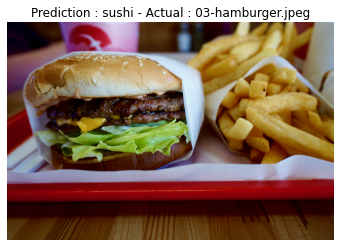

In [75]:
predict_image(model = model_4,image_name = '03-hamburger.jpeg')

--2023-02-12 06:28:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.06s   

2023-02-12 06:28:33 (29.3 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

1/1 [==============================] - 0s 35ms/step


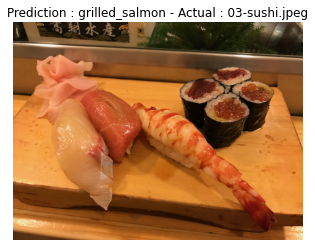

In [76]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

predict_image(model = model_4,image_name = '03-sushi.jpeg')

--2023-02-12 06:29:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2023-02-12 06:29:22 (42.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 22ms/step


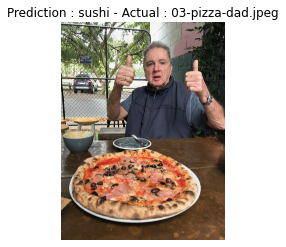

In [77]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

predict_image(model = model_4,image_name = '03-pizza-dad.jpeg')

--2023-02-12 06:30:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-02-12 06:30:12 (33.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]

1/1 [==============================] - 0s 31ms/step


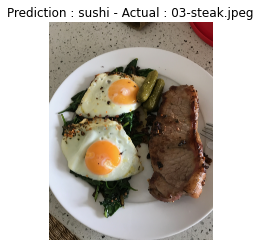

In [78]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

predict_image(model = model_4,image_name = '03-steak.jpeg')

#Inference : All our prediction went wrong on the unseen data as the model has maximum of 41% accuracy

Note : We will increase the model performance using other methods in the upcoming notebooks